In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels
from scipy import stats
from scipy.stats import boxcox
import scipy
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportions_chisquare
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
SolarState = pd.read_excel('C:/Users/claud/OneDrive/Documents/1FinalP/SeiaOrg2.xlsx')

In [3]:
SunPoweredByState = pd.read_csv('C:/Users/claud/OneDrive/Documents/1FinalP/SunPowerState2.csv')

In [4]:
SunPoweredByState

,region_name,state_name,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,...,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count
0,Alabama,Alabama,1083.961668,700683,74.381423,78.455420,3953535,11546085,7843143,9234342,...,1.128360e+09,3.874097e+09,2.420185e+09,2.801916e+09,8.736817e+09,12069.322660,1.896138e+10,"[[0,137667],[5,221548],[10,148580],[15,74864],...",1.202295e+07,549
1,Alaska,Alaska,799.534984,27583,50.685736,37.150323,11299,485483,211340,214246,...,2.186594e+06,1.119332e+08,4.490719e+07,4.491908e+07,2.625466e+08,6540.612622,4.664927e+08,"[[0,7503],[5,10425],[10,4409],[15,1538],[20,84...",1.921975e+05,83
2,Arizona,Arizona,1378.221736,1638999,82.343259,91.615986,4989235,24748479,15838985,21937855,...,1.780583e+09,1.085184e+10,6.054637e+09,8.640896e+09,1.906534e+10,18974.796640,4.639329e+10,"[[0,199346],[5,449953],[10,417070],[15,259587]...",1.991384e+07,39553
3,Arkansas,Arkansas,1074.689511,322235,63.187435,75.680036,1624551,5384563,3402749,4316886,...,4.554100e+08,1.799874e+09,1.020895e+09,1.308459e+09,4.356971e+09,12099.947970,8.941609e+09,"[[0,62028],[5,98712],[10,69090],[15,34138],[20...",5.619081e+06,238
4,California,California,1276.813141,7841387,87.964252,87.051870,36861554,107828275,72399879,92215390,...,1.215200e+10,4.295210e+10,2.585561e+10,3.349004e+10,8.356659e+10,14460.077980,1.980160e+11,"[[0,1484911],[5,2508881],[10,1773721],[15,9258...",5.449561e+07,328899
5,Colorado,Colorado,1246.368033,927359,73.601479,78.928536,491589,12795273,7872722,8529952,...,1.539496e+08,4.918588e+09,2.732604e+09,2.874648e+09,9.027789e+09,9690.190088,1.970758e+10,"[[0,289523],[5,362194],[10,139371],[15,51537],...",1.199962e+07,24140
6,Connecticut,Connecticut,994.924611,494902,70.842052,66.966882,613009,6405619,4348728,4288660,...,1.565611e+08,1.927663e+09,1.197999e+09,1.167717e+09,4.557093e+09,7091.383154,9.007033e+09,"[[0,179672],[5,187313],[10,63081],[15,20971],[...",3.899820e+06,5253
7,Delaware,Delaware,1037.238470,27780,13.588488,73.843700,88647,439262,306328,342448,...,2.377223e+07,1.425608e+08,8.919382e+07,1.009771e+08,2.503621e+08,9746.691431,6.068660e+08,"[[0,7276],[5,9678],[10,5064],[15,2109],[20,942...",3.856395e+05,90
8,District of Columbia,District of Columbia,1039.550000,53440,88.195960,47.388490,73635,444024,227458,284577,...,1.980831e+07,1.436869e+08,6.672377e+07,8.281086e+07,6.319429e+08,5156.452783,9.449727e+08,"[[0,30410],[5,12822],[10,3203],[15,1360],[20,8...",6.004930e+05,443
9,Florida,Florida,1162.082409,3682989,68.298566,88.393850,30938608,59204428,44058744,54109998,...,9.532882e+09,2.148870e+10,1.457666e+10,1.805096e+10,4.141346e+10,17250.183060,1.050630e+11,"[[0,406931],[5,890395],[10,918023],[15,620753]...",5.640546e+07,104123


In [5]:
SolarState.head()

,State,ITC,Solar Rankings,Homes Powered,Percent electricity,Companies,Investments,Fallen Prices,Growth Projections,Growth Ranks
0,AL,0.26,35,30050,0.0028,42,339000000,0.36,1349,27
1,AK,0.26,49,1502,0.0019,12,33000000,0.36,30,51
2,AZ,0.26,5,907817,0.0823,361,14600000000,0.36,5316,7
3,AR,0.26,30,45613,0.0087,32,527000000,0.36,982,32
4,CA,0.26,1,8430324,0.2425,2438,74500000000,0.36,21444,2


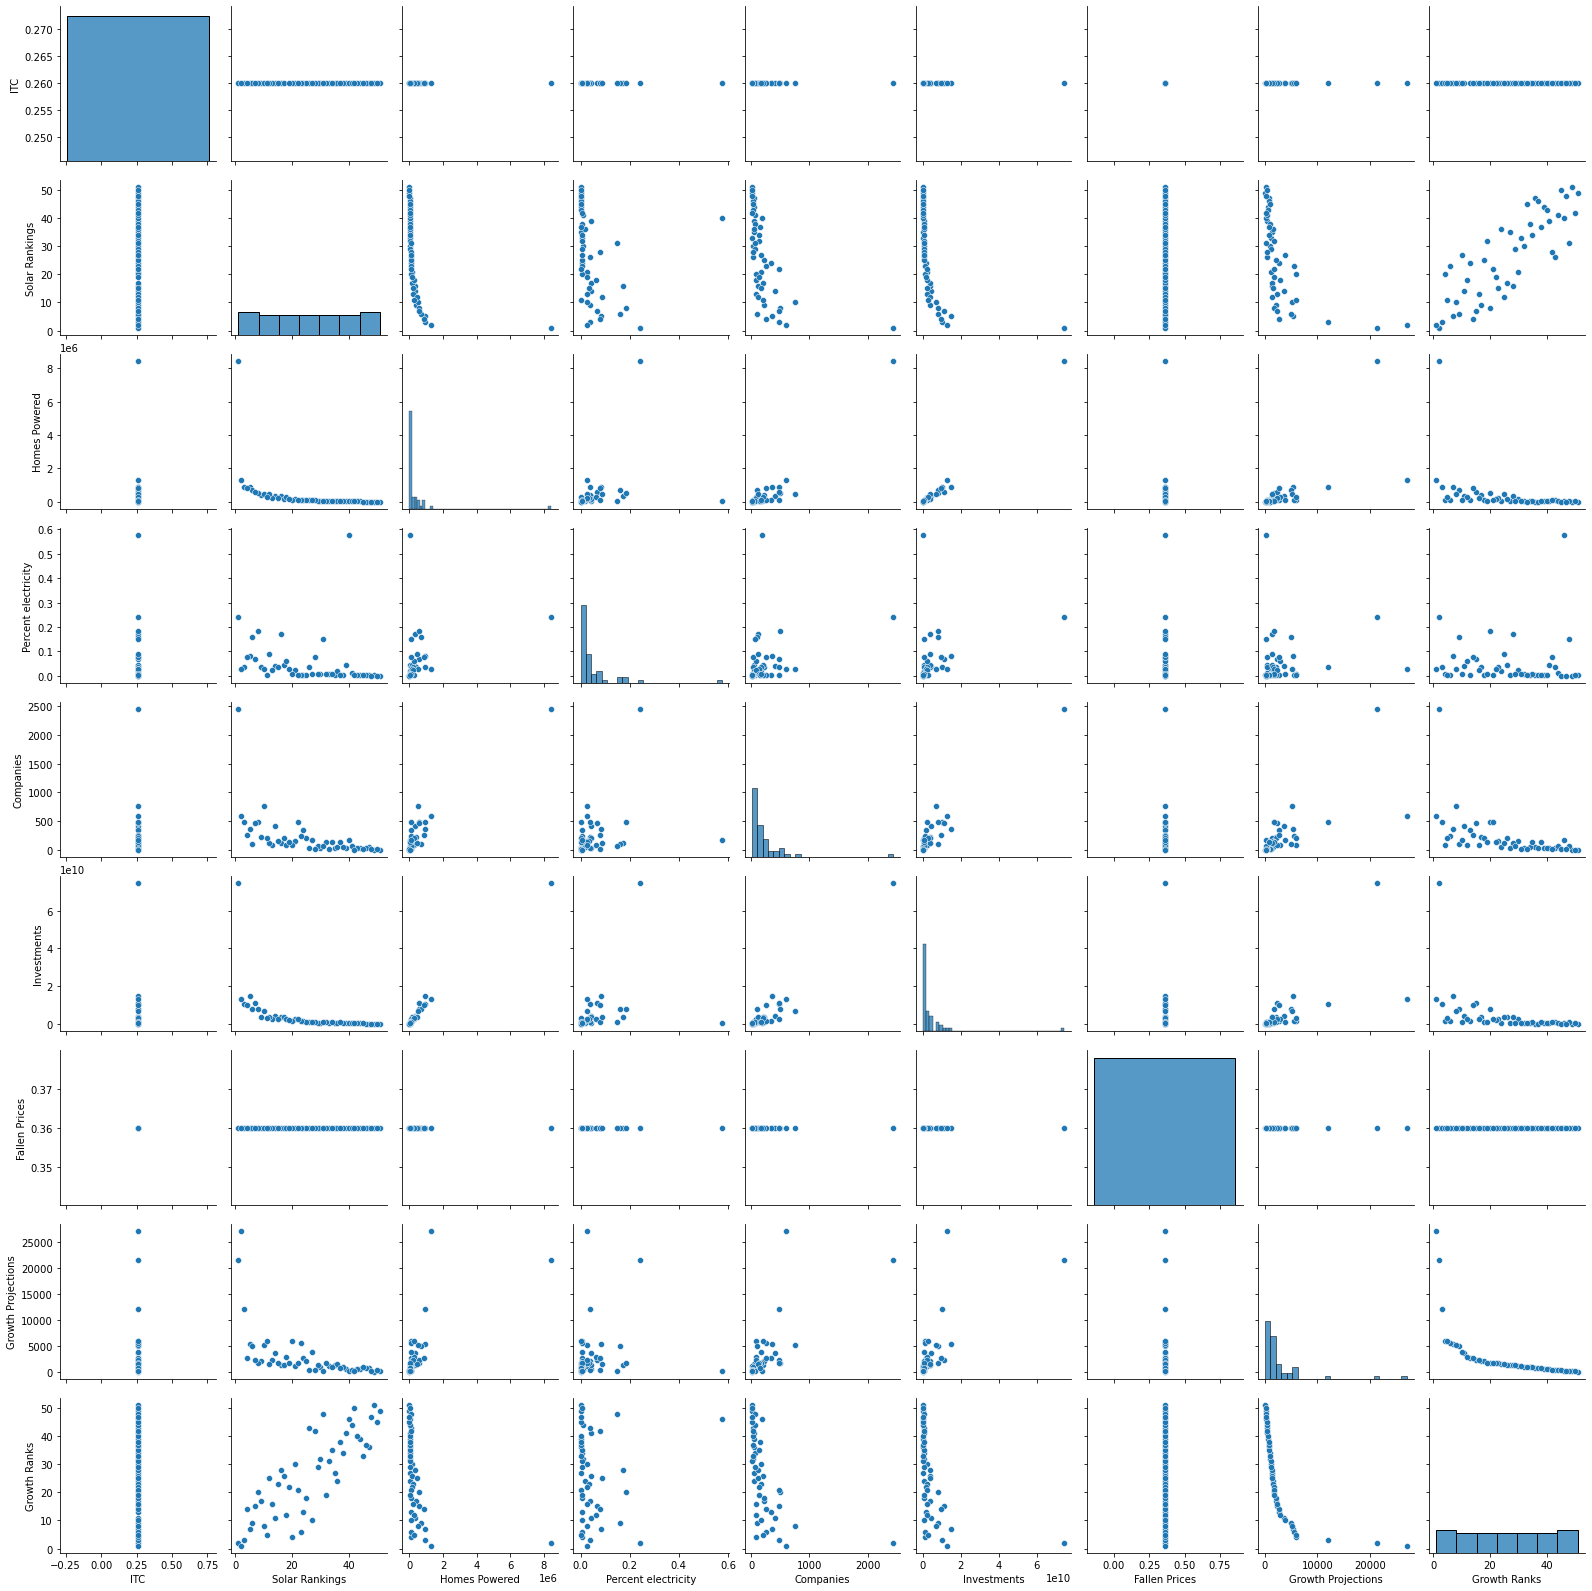

In [6]:
sns.pairplot(SolarState)

# As per the results from Seia.Org Texas is the highest Solar Power generation and rankings

In [7]:
SolarState[['State','Solar Rankings']].sort_values(by=['Solar Rankings'])

,State,Solar Rankings
4,CA,1
43,TX,2
9,FL,3
33,NC,4
2,AZ,5
28,NV,6
30,NJ,7
21,MA,8
10,GA,9
32,NY,10


In [8]:
SolarState.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                51 non-null     object 
 1   ITC                  50 non-null     float64
 2   Solar Rankings       51 non-null     int64  
 3   Homes Powered        51 non-null     int64  
 4   Percent electricity  51 non-null     float64
 5   Companies            51 non-null     int64  
 6   Investments          51 non-null     int64  
 7   Fallen Prices        51 non-null     float64
 8   Growth Projections   51 non-null     int64  
 9   Growth Ranks         51 non-null     int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 4.1+ KB


In [9]:
SolarState.columns

Index(['State', 'ITC', 'Solar Rankings', 'Homes Powered',
       'Percent electricity', 'Companies', 'Investments', 'Fallen Prices',
       'Growth Projections', 'Growth Ranks'],
      dtype='object')

In [10]:
continuous_vars = ['Homes Powered',
       'Percent electricity', 'Companies', 'Investments',
       'Growth Projections']

In [11]:
#SolarState['Solar Rankings']

In [12]:
SolarState[SolarState["Homes Powered"] == 8430324]

,State,ITC,Solar Rankings,Homes Powered,Percent electricity,Companies,Investments,Fallen Prices,Growth Projections,Growth Ranks
4,CA,0.26,1,8430324,0.2425,2438,74500000000,0.36,21444,2


In [13]:
SolarState["Percent electricity"].max()

0.5758

In [14]:
SolarState[SolarState["Percent electricity"] == 0.5758]

,State,ITC,Solar Rankings,Homes Powered,Percent electricity,Companies,Investments,Fallen Prices,Growth Projections,Growth Ranks
8,DC,0.26,40,22894,0.5758,179,359000000,0.36,245,46


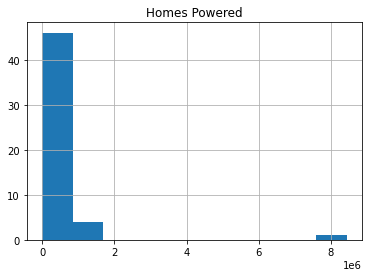

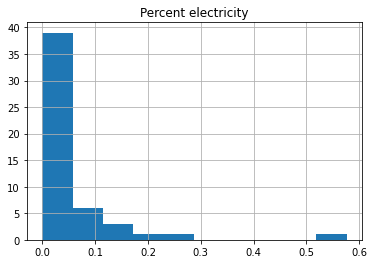

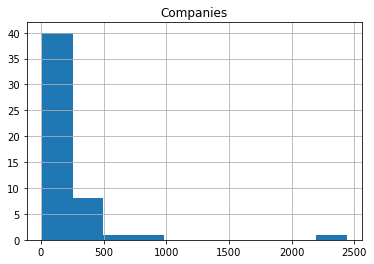

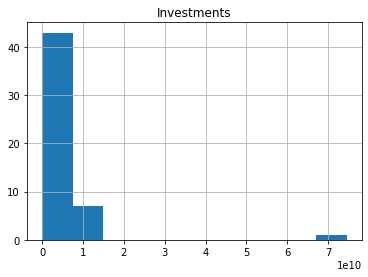

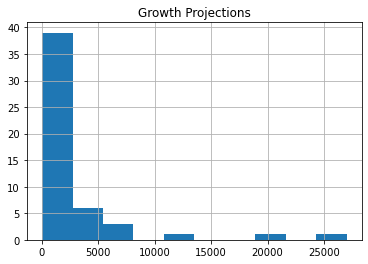

In [15]:
for cv in continuous_vars:
    SolarState[cv].hist()
    plt.title(cv)
    plt.show()

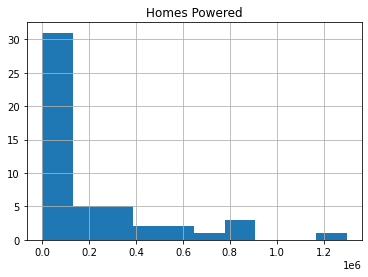

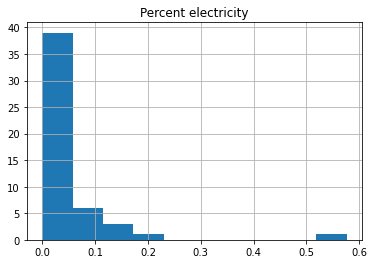

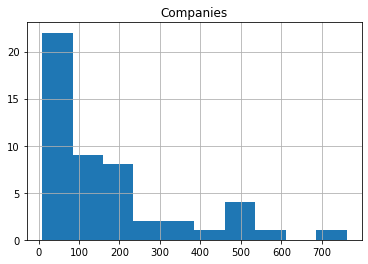

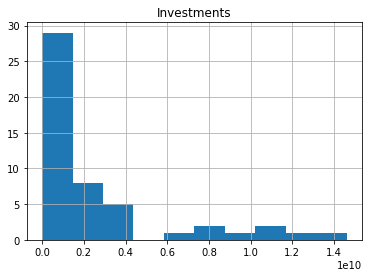

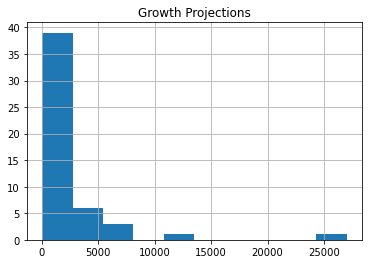

In [15]:
for cv in continuous_vars:
    SolarState.loc[SolarState["State"] != "CA"][cv].hist()
    plt.title(cv)
    plt.show()

<AxesSubplot:xlabel='Homes Powered', ylabel='Percent electricity'>

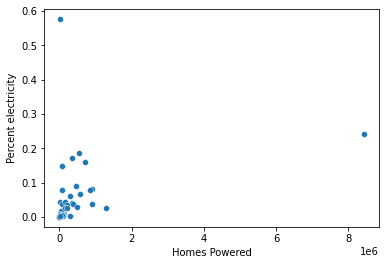

In [16]:
sns.scatterplot(x='Homes Powered', y= 'Percent electricity', data=SolarState)

<AxesSubplot:>

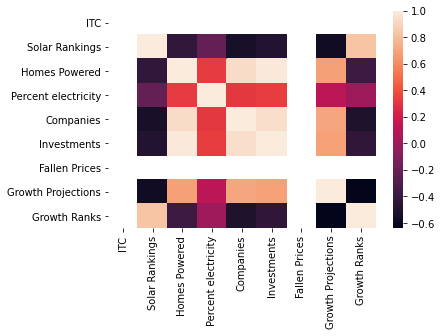

In [17]:
sns.heatmap(SolarState.corr())

In [18]:
SolarState["State"].values

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [19]:
reg_df=pd.read_csv('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv')

In [23]:
reg_df.columns = ["State Name", "State", "Region", "Divisions"]
reg_df = reg_df[["State Name", "State", "Region"]]

ValueError: Length mismatch: Expected axis has 3 elements, new values have 4 elements

In [24]:
reg_df.head()

,State Name,State,Region
0,Alaska,AK,West
1,Alabama,AL,South
2,Arkansas,AR,South
3,Arizona,AZ,West
4,California,CA,West


In [25]:
SunPoweredByState = SunPoweredByState.iloc[1:,:]

In [26]:
SunPoweredByState.columns

Index(['region_name', 'state_name', 'yearly_sunlight_kwh_kw_threshold_avg',
       'count_qualified', 'percent_covered', 'percent_qualified',
       'number_of_panels_n', 'number_of_panels_s', 'number_of_panels_e',
       'number_of_panels_w', 'number_of_panels_f', 'number_of_panels_median',
       'number_of_panels_total', 'kw_median', 'kw_total',
       'yearly_sunlight_kwh_n', 'yearly_sunlight_kwh_s',
       'yearly_sunlight_kwh_e', 'yearly_sunlight_kwh_w',
       'yearly_sunlight_kwh_f', 'yearly_sunlight_kwh_median',
       'yearly_sunlight_kwh_total', 'install_size_kw_buckets_json',
       'carbon_offset_metric_tons', 'existing_installs_count'],
      dtype='object')

In [28]:
SunPoweredByState.columns = ['region_name', 'State Name', 
       'yearly_sunlight_kwh_kw_threshold_avg',
       'count_qualified', 'percent_covered', 'percent_qualified',
       'number_of_panels_n', 'number_of_panels_s', 'number_of_panels_e',
       'number_of_panels_w', 'number_of_panels_f', 'number_of_panels_median',
       'number_of_panels_total', 'kw_median', 'kw_total',
       'yearly_sunlight_kwh_n', 'yearly_sunlight_kwh_s',
       'yearly_sunlight_kwh_e', 'yearly_sunlight_kwh_w',
       'yearly_sunlight_kwh_f', 'yearly_sunlight_kwh_median',
       'yearly_sunlight_kwh_total', 'install_size_kw_buckets_json',
       'carbon_offset_metric_tons', 'existing_installs_count']

In [26]:
SunPoweredByState

,region_name,State Name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,...,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count
1,Alabama,Alabama,34.991768,30.187614,-84.957065,-88.412099,32.940784,-86.850699,1083.961668,700683,...,1.128360e+09,3.874097e+09,2.420185e+09,2.801916e+09,8.736817e+09,12069.322660,1.896138e+10,"[[0,137667],[5,221548],[10,148580],[15,74864],...",1.202295e+07,549
2,Alaska,Alaska,71.335131,51.851636,-131.520140,-176.657408,61.374116,-148.508058,799.534984,27583,...,2.186594e+06,1.119332e+08,4.490719e+07,4.491908e+07,2.625466e+08,6540.612622,4.664927e+08,"[[0,7503],[5,10425],[10,4409],[15,1538],[20,84...",1.921975e+05,83
3,Arizona,Arizona,36.999901,31.332926,-109.045424,-114.791451,33.345498,-111.894876,1378.221736,1638999,...,1.780583e+09,1.085184e+10,6.054637e+09,8.640896e+09,1.906534e+10,18974.796640,4.639329e+10,"[[0,199346],[5,449953],[10,417070],[15,259587]...",1.991384e+07,39553
4,Arkansas,Arkansas,36.499169,33.014611,-89.730587,-94.616569,35.097736,-92.652403,1074.689511,322235,...,4.554100e+08,1.799874e+09,1.020895e+09,1.308459e+09,4.356971e+09,12099.947970,8.941609e+09,"[[0,62028],[5,98712],[10,69090],[15,34138],[20...",5.619081e+06,238
5,California,California,41.997974,32.539982,-114.133090,-124.350229,35.584029,-119.433405,1276.813141,7841387,...,1.215200e+10,4.295210e+10,2.585561e+10,3.349004e+10,8.356659e+10,14460.077980,1.980160e+11,"[[0,1484911],[5,2508881],[10,1773721],[15,9258...",5.449561e+07,328899
6,Colorado,Colorado,41.002275,37.005475,-102.112339,-109.015321,39.528334,-105.222909,1246.368033,927359,...,1.539496e+08,4.918588e+09,2.732604e+09,2.874648e+09,9.027789e+09,9690.190088,1.970758e+10,"[[0,289523],[5,362194],[10,139371],[15,51537],...",1.199962e+07,24140
7,Connecticut,Connecticut,42.047584,40.987811,-71.788138,-73.723927,41.500004,-72.929717,994.924611,494902,...,1.565611e+08,1.927663e+09,1.197999e+09,1.167717e+09,4.557093e+09,7091.383154,9.007033e+09,"[[0,179672],[5,187313],[10,63081],[15,20971],[...",3.899820e+06,5253
8,Delaware,Delaware,39.838943,38.451334,-75.049958,-75.788631,39.361974,-75.534180,1037.238470,27780,...,2.377223e+07,1.425608e+08,8.919382e+07,1.009771e+08,2.503621e+08,9746.691431,6.068660e+08,"[[0,7276],[5,9678],[10,5064],[15,2109],[20,942...",3.856395e+05,90
9,District of Columbia,District of Columbia,38.995440,38.811652,-76.909711,-77.115010,38.914675,-77.011231,1039.550000,53440,...,1.980831e+07,1.436869e+08,6.672377e+07,8.281086e+07,6.319429e+08,5156.452783,9.449727e+08,"[[0,30410],[5,12822],[10,3203],[15,1360],[20,8...",6.004930e+05,443
10,Florida,Florida,30.997973,24.545218,-80.031344,-87.518178,27.913580,-81.751371,1162.082409,3682989,...,9.532882e+09,2.148870e+10,1.457666e+10,1.805096e+10,4.141346e+10,17250.183060,1.050630e+11,"[[0,406931],[5,890395],[10,918023],[15,620753]...",5.640546e+07,104123


In [29]:
reg_df = reg_df.merge(SunPoweredByState)

In [30]:
reg_df

,State Name,State,Region,region_name,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,...,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count
0,Alaska,AK,West,Alaska,799.534984,27583,50.685736,37.150323,11299,485483,...,2.186594e+06,1.119332e+08,4.490719e+07,4.491908e+07,2.625466e+08,6540.612622,4.664927e+08,"[[0,7503],[5,10425],[10,4409],[15,1538],[20,84...",1.921975e+05,83
1,Arkansas,AR,South,Arkansas,1074.689511,322235,63.187435,75.680036,1624551,5384563,...,4.554100e+08,1.799874e+09,1.020895e+09,1.308459e+09,4.356971e+09,12099.947970,8.941609e+09,"[[0,62028],[5,98712],[10,69090],[15,34138],[20...",5.619081e+06,238
2,Arizona,AZ,West,Arizona,1378.221736,1638999,82.343259,91.615986,4989235,24748479,...,1.780583e+09,1.085184e+10,6.054637e+09,8.640896e+09,1.906534e+10,18974.796640,4.639329e+10,"[[0,199346],[5,449953],[10,417070],[15,259587]...",1.991384e+07,39553
3,California,CA,West,California,1276.813141,7841387,87.964252,87.051870,36861554,107828275,...,1.215200e+10,4.295210e+10,2.585561e+10,3.349004e+10,8.356659e+10,14460.077980,1.980160e+11,"[[0,1484911],[5,2508881],[10,1773721],[15,9258...",5.449561e+07,328899
4,Colorado,CO,West,Colorado,1246.368033,927359,73.601479,78.928536,491589,12795273,...,1.539496e+08,4.918588e+09,2.732604e+09,2.874648e+09,9.027789e+09,9690.190088,1.970758e+10,"[[0,289523],[5,362194],[10,139371],[15,51537],...",1.199962e+07,24140
5,Connecticut,CT,Northeast,Connecticut,994.924611,494902,70.842052,66.966882,613009,6405619,...,1.565611e+08,1.927663e+09,1.197999e+09,1.167717e+09,4.557093e+09,7091.383154,9.007033e+09,"[[0,179672],[5,187313],[10,63081],[15,20971],[...",3.899820e+06,5253
6,District of Columbia,DC,South,District of Columbia,1039.550000,53440,88.195960,47.388490,73635,444024,...,1.980831e+07,1.436869e+08,6.672377e+07,8.281086e+07,6.319429e+08,5156.452783,9.449727e+08,"[[0,30410],[5,12822],[10,3203],[15,1360],[20,8...",6.004930e+05,443
7,Delaware,DE,South,Delaware,1037.238470,27780,13.588488,73.843700,88647,439262,...,2.377223e+07,1.425608e+08,8.919382e+07,1.009771e+08,2.503621e+08,9746.691431,6.068660e+08,"[[0,7276],[5,9678],[10,5064],[15,2109],[20,942...",3.856395e+05,90
8,Florida,FL,South,Florida,1162.082409,3682989,68.298566,88.393850,30938608,59204428,...,9.532882e+09,2.148870e+10,1.457666e+10,1.805096e+10,4.141346e+10,17250.183060,1.050630e+11,"[[0,406931],[5,890395],[10,918023],[15,620753]...",5.640546e+07,104123
9,Georgia,GA,South,Georgia,1090.131647,1258681,71.708924,70.480306,4611494,19777126,...,1.314985e+09,6.568039e+09,3.505007e+09,4.658827e+09,1.652949e+10,9817.647650,3.257635e+10,"[[0,323852],[5,453070],[10,222257],[15,94630],...",1.948020e+07,1893


In [31]:
SolarState = SolarState.merge(reg_df)

In [32]:
pd.set_option("display.max_columns",38)

In [33]:
SolarState

,State,ITC,Solar Rankings,Homes Powered,Percent electricity,Companies,Investments,Fallen Prices,Growth Projections,Growth Ranks,State Name,Region,region_name,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,number_of_panels_total,kw_median,kw_total,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count
0,AK,0.26,49,1502,0.00190,12,33000000,0.36,30,51,Alaska,West,Alaska,799.534984,27583,50.685736,37.150323,11299,485483,211340,214246,1256756,29,2179124,7.25,5.447810e+05,2.186594e+06,1.119332e+08,4.490719e+07,4.491908e+07,2.625466e+08,6540.612622,4.664927e+08,"[[0,7503],[5,10425],[10,4409],[15,1538],[20,84...",1.921975e+05,83
1,AZ,0.26,5,907817,0.08230,361,14600000000,0.36,5316,7,Arizona,West,Arizona,1378.221736,1638999,82.343259,91.615986,4989235,24748479,15838985,21937855,47183254,47,114697808,11.75,2.867445e+07,1.780583e+09,1.085184e+10,6.054637e+09,8.640896e+09,1.906534e+10,18974.796640,4.639329e+10,"[[0,199346],[5,449953],[10,417070],[15,259587]...",1.991384e+07,39553
2,AR,0.26,30,45613,0.00870,32,527000000,0.36,982,32,Arkansas,South,Arkansas,1074.689511,322235,63.187435,75.680036,1624551,5384563,3402749,4316886,13401447,39,28130196,9.75,7.032549e+06,4.554100e+08,1.799874e+09,1.020895e+09,1.308459e+09,4.356971e+09,12099.947970,8.941609e+09,"[[0,62028],[5,98712],[10,69090],[15,34138],[20...",5.619081e+06,238
3,CA,0.26,1,8430324,0.24250,2438,74500000000,0.36,21444,2,California,West,California,1276.813141,7841387,87.964252,87.051870,36861554,107828275,72399879,92215390,221717559,39,531022657,9.75,1.327557e+08,1.215200e+10,4.295210e+10,2.585561e+10,3.349004e+10,8.356659e+10,14460.077980,1.980160e+11,"[[0,1484911],[5,2508881],[10,1773721],[15,9258...",5.449561e+07,328899
4,CO,0.26,14,335951,0.04180,415,4300000000,0.36,3683,11,Colorado,West,Colorado,1246.368033,927359,73.601479,78.928536,491589,12795273,7872722,8529952,25485217,27,55174753,6.75,1.379369e+07,1.539496e+08,4.918588e+09,2.732604e+09,2.874648e+09,9.027789e+09,9690.190088,1.970758e+10,"[[0,289523],[5,362194],[10,139371],[15,51537],...",1.199962e+07,24140
5,CT,0.26,21,134691,0.02450,163,2400000000,0.36,1113,30,Connecticut,Northeast,Connecticut,994.924611,494902,70.842052,66.966882,613009,6405619,4348728,4288660,15594874,25,31250890,6.25,7.812722e+06,1.565611e+08,1.927663e+09,1.197999e+09,1.167717e+09,4.557093e+09,7091.383154,9.007033e+09,"[[0,179672],[5,187313],[10,63081],[15,20971],[...",3.899820e+06,5253
6,DE,0.26,39,18287,0.04320,43,468000000,0.36,468,41,Delaware,South,Delaware,1037.238470,27780,13.588488,73.843700,88647,439262,306328,342448,808704,32,1985389,8.00,4.963472e+05,2.377223e+07,1.425608e+08,8.919382e+07,1.009771e+08,2.503621e+08,9746.691431,6.068660e+08,"[[0,7276],[5,9678],[10,5064],[15,2109],[20,942...",3.856395e+05,90
7,DC,0.26,40,22894,0.57580,179,359000000,0.36,245,46,District of Columbia,South,District of Columbia,1039.550000,53440,88.195960,47.388490,73635,444024,227458,284577,2067166,17,3096860,4.25,7.742150e+05,1.980831e+07,1.436869e+08,6.672377e+07,8.281086e+07,6.319429e+08,5156.452783,9.449727e+08,"[[0,30410],[5,12822],[10,3203],[15,1360],[20,8...",6.004930e+05,443
8,FL,0.26,3,908181,0.03740,482,10300000000,0.36,12046,3,Florida,South,Florida,1162.082409,3682989,68.298566,88.393850,30938608,59204428,44058744,54109998,117370596,51,305682374,12.75,7.642059e+07,9.532882e+09,2.148870e+10,1.457666e+10,1.805096e+10,4.141346e+10,17250.183060,1.050630e+11,"[[0,406931],[5,890395],[10,918023],[15,620753]...",5.640546e+07,104123
9,GA,0.26,9,373248,0.03650,222,3800000000,0.36,2082,17,Georgia,South,Georgia,1090.131647,1258681,71.708924,70.480306,4611494,19777126,11618154,15064530,50067319,31,101138623,7.75,2.528466e+07,1.3

In [34]:
SolarState.corr().columns

Index(['ITC', 'Solar Rankings', 'Homes Powered', 'Percent electricity',
       'Companies', 'Investments', 'Fallen Prices', 'Growth Projections',
       'Growth Ranks', 'yearly_sunlight_kwh_kw_threshold_avg',
       'count_qualified', 'percent_covered', 'percent_qualified',
       'number_of_panels_n', 'number_of_panels_s', 'number_of_panels_e',
       'number_of_panels_w', 'number_of_panels_f', 'number_of_panels_median',
       'number_of_panels_total', 'kw_median', 'kw_total',
       'yearly_sunlight_kwh_n', 'yearly_sunlight_kwh_s',
       'yearly_sunlight_kwh_e', 'yearly_sunlight_kwh_w',
       'yearly_sunlight_kwh_f', 'yearly_sunlight_kwh_median',
       'yearly_sunlight_kwh_total', 'carbon_offset_metric_tons',
       'existing_installs_count'],
      dtype='object')

<AxesSubplot:>

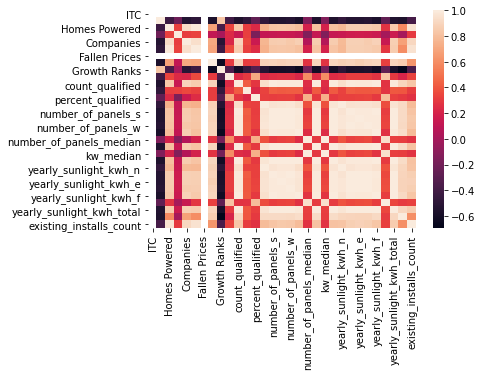

In [35]:
#sns.set(rc = {'figure.figsize':(8,8)})
sns.heatmap(SolarState.corr())

In [36]:
SolarState.groupby("Region").mean()

,ITC,Solar Rankings,Homes Powered,Percent electricity,Companies,Investments,Fallen Prices,Growth Projections,Growth Ranks,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,number_of_panels_total,kw_median,kw_total,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,carbon_offset_metric_tons,existing_installs_count
Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Midwest,0.26,32.333333,67324.666667,0.006717,128.916667,7.875000e+08,0.36,2117.916667,25.666667,1015.787514,7.502652e+05,59.387032,73.275323,2.381007e+06,1.085245e+07,6.465629e+06,8.452133e+06,2.655525e+07,30.416667,5.470647e+07,7.604167,1.367662e+07,6.094239e+08,3.345675e+09,1.786648e+09,2.366557e+09,7.859110e+09,8962.439498,1.596741e+10,1.206828e+07,1281.833333
Northeast,0.26,22.666667,229133.111111,0.062733,287.777778,3.666778e+09,0.36,1610.666667,28.000000,982.508444,6.528501e+05,54.027119,67.694410,1.272462e+06,7.358756e+06,5.057685e+06,5.119256e+06,2.192144e+07,24.333333,4.072960e+07,6.083333,1.018240e+07,3.220691e+08,2.216233e+09,1.395417e+09,1.401158e+09,6.390413e+09,6929.410736,1.172529e+10,6.323415e+06,6526.777778
South,0.26,25.687500,267197.937500,0.056067,164.187500,3.059938e+09,0.36,3796.687500,25.062500,1074.368782,1.034600e+06,59.760945,76.175851,5.578794e+06,1.573865e+07,1.053094e+07,1.296413e+07,3.534501e+07,34.000000,8.015752e+07,8.500000,2.003938e+07,1.645602e+09,5.441145e+09,3.290472e+09,4.136487e+09,1.188738e+10,10730.859707,2.640109e+10,1.524056e+07,9051.750000
West,0.26,22.153846,903648.769231,0.070908,310.153846,8.844538e+09,0.36,3434.000000,26.000000,1163.550682,1.107470e+06,66.259588,80.785016,4.137660e+06,1.549747e+07,1.004354e+07,1.310166e+07,3.147037e+07,36.461538,7.425070e+07,9.115385,1.856268e+07,1.322514e+09,5.957782e+09,3.471679e+09,4.563039e+09,1.144302e+10,12549.427274,2.675801e+10,8.772923e+06,34843.692308


In [37]:
SolarState.groupby("Region").median()

,ITC,Solar Rankings,Homes Powered,Percent electricity,Companies,Investments,Fallen Prices,Growth Projections,Growth Ranks,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,number_of_panels_total,kw_median,kw_total,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,carbon_offset_metric_tons,existing_installs_count
Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Midwest,0.26,28.0,65669.0,0.00495,112.5,7.265000e+08,0.36,1434.5,26.0,989.635806,734546.0,61.518602,73.732345,1604431.0,11521883.0,6448632.5,8301575.0,27140068.0,30.0,57113674.5,7.50,1.427842e+07,4.074335e+08,3.494379e+09,1.757259e+09,2.265874e+09,7.936996e+09,8710.165197,1.653356e+10,1.100200e+07,1255.0
Northeast,0.26,22.0,96251.0,0.02830,163.0,2.300000e+09,0.36,1519.0,24.0,983.899900,494902.0,54.681951,67.473948,613009.0,6405619.0,4348728.0,4288660.0,15594874.0,24.0,31250890.0,6.00,7.812722e+06,1.565611e+08,1.927663e+09,1.197999e+09,1.167717e+09,4.557093e+09,6968.881885,9.007033e+09,3.899820e+06,4414.0
South,0.26,31.0,40538.0,0.01700,113.0,5.970000e+08,0.36,1236.5,28.5,1082.410579,699473.0,62.868689,76.360527,2022546.0,10819220.0,6608062.0,8427151.5,22394073.5,34.0,50705848.5,8.50,1.267646e+07,5.596948e+08,3.722935e+09,2.005864e+09,2.569302e+09,7.530557e+09,10447.829005,1.641009e+10,1.070059e+07,1291.0
West,0.26,18.0,284169.0,0.04180,119.0,2.400000e+09,0.36,1447.0,25.0,1204.253680,501233.0,69.717083,84.024601,571870.0,6903315.0,3699521.0,5899811.0,15599880.0,35.0,32766616.0,8.75,8.191654e+06,2.093943e+08,2.601275e+09,1.220547e+09,1.981446e+09,5.066268e+09,10979.662920,1.142862e+10,3.781027e+06,5747.0


In [38]:
SolarState.groupby("Region").std()

,ITC,Solar Rankings,Homes Powered,Percent electricity,Companies,Investments,Fallen Prices,Growth Projections,Growth Ranks,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,number_of_panels_total,kw_median,kw_total,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,carbon_offset_metric_tons,existing_installs_count
Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Midwest,0.0,12.390123,6.294888e+04,0.009422,105.101214,7.222411e+08,0.0,1980.143037,15.523199,52.791959,5.777018e+05,11.009780,5.022861,2.352748e+06,7.929251e+06,4.727852e+06,6.092983e+06,1.933937e+07,3.476109,4.001150e+07,0.869027,1.000288e+07,5.884866e+08,2.360429e+09,1.274220e+09,1.648720e+09,5.582517e+09,1233.395764,1.133172e+10,9.863359e+06,1077.394486
Northeast,0.0,12.429803,2.352261e+05,0.064920,266.667760,3.993339e+09,0.0,1489.645092,13.937360,15.427869,6.942862e+05,18.305381,3.701072,1.649088e+06,7.230695e+06,4.909102e+06,5.369336e+06,2.220236e+07,1.000000,4.114938e+07,0.250000,1.028735e+07,4.150683e+08,2.177600e+09,1.347969e+09,1.472577e+09,6.467976e+09,246.860569,1.182620e+10,6.742544e+06,7566.460529
South,0.0,16.827433,3.983962e+05,0.140330,168.707328,4.197997e+09,0.0,6850.136191,14.821015,49.659718,1.287451e+06,18.208406,9.822628,9.246907e+06,1.972506e+07,1.327019e+07,1.729540e+07,4.225790e+07,8.610072,1.011794e+08,2.152518,2.529485e+07,2.813300e+09,7.081169e+09,4.313488e+09,5.746340e+09,1.477044e+10,3083.707601,3.452010e+10,1.756168e+07,25627.827603
West,0.0,15.868450,2.278715e+06,0.076491,651.202202,2.013857e+10,0.0,5694.940605,17.073371,200.356541,2.081402e+06,15.072480,14.450038,9.962321e+06,2.866976e+07,1.925281e+07,2.458200e+07,5.868288e+07,7.501282,1.409997e+08,1.875320,3.524992e+07,3.292089e+09,1.148320e+10,6.910454e+09,8.978505e+09,2.223691e+10,4293.154898,5.284625e+10,1.477821e+07,89199.941894


# Basic Anova for regions & Regression predicting homes powered, using other dataset's predictor variables

In [40]:
SolarCostPanel = pd.read_excel('C:/Users/claud/OneDrive/Documents/1FinalP/CostOfPanelUSA.xlsx')

In [41]:
SolarCostPanel.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,7.53,6.62,4.67,4.09,3.6,3.36,3.16,2.94,2.78,2.77,2.71


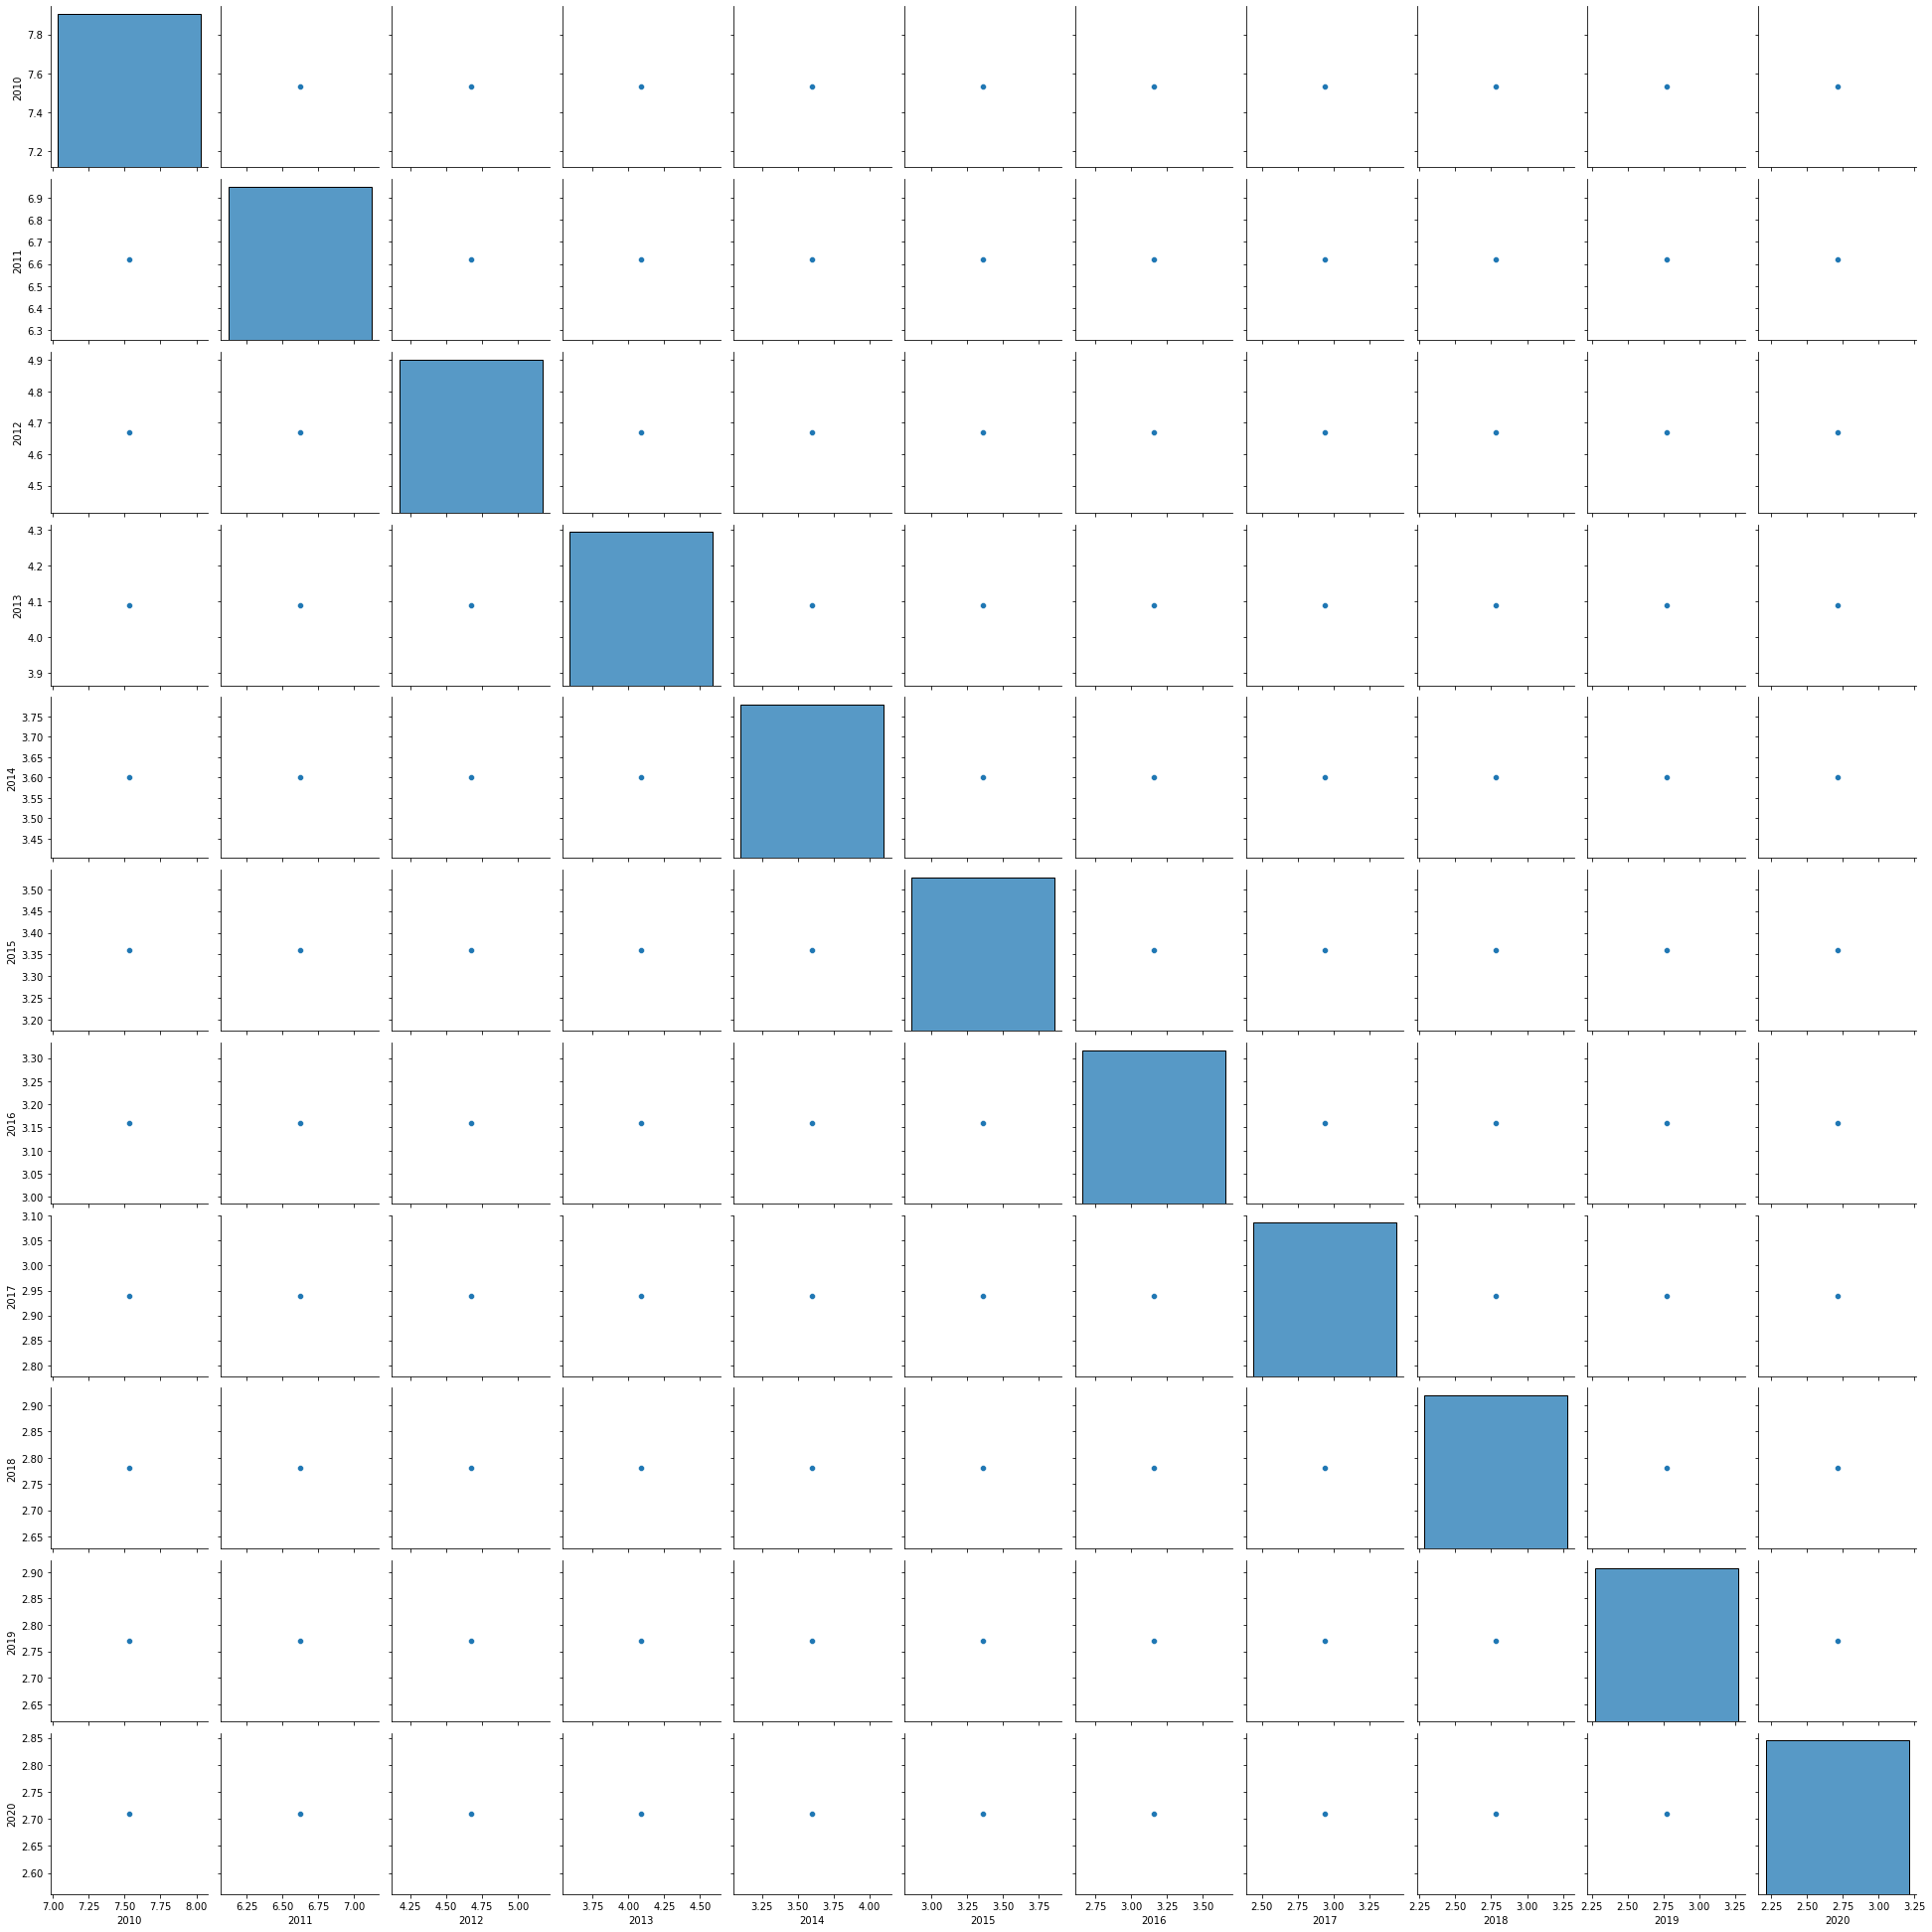

In [42]:
sns.pairplot(SolarCostPanel)

# As per the evaluations with the dataset that we were able to find we were able to confirm that the cost of panels have decreased over time.

In [43]:
#can we find a correlation between the cost of the panels with the California number of panels available to see how much they have saved from 2010 to 2019? Since the panels have been decreasing in price how much did people save?
# How much in kilowt is saved compared to the solar energy from the panels? questions I would love to have
